In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Forward pass

For demonstration purposes we define a simple network, fix its weights and see what is the result of the forward pass. We'll also implement the forward pass with numpy.

In [2]:
model = keras.Sequential()
model.add(layers.Dense(1, input_shape=(3,), activation='sigmoid'))

W = model.layers[0].get_weights() # this gives us the weights for layer 0 (ie. the only layer in the network)
print("Initial weights:")
print(W) # the weights are random numbers close to 0.0

# let's set weight values
W[0][0] = 1.
W[0][1] = 2.
W[0][2] = 3.
W[1][0] = -4.9
model.layers[0].set_weights(W)
print("Weights after set_weights():")
print(model.layers[0].get_weights()) # verify that the weights have been set

input_sample = np.array(([2,0,1],), dtype=np.float32) # input sample

print("Result of forward pass:")
# forward propagation with input sample converted to tensorflow tensor (details of tensorflow skipped here)
print(model.call(tf.convert_to_tensor(input_sample))) 

# do the same thing with numpy

X = np.column_stack((np.ones((1,)),input_sample))[0]
w = np.column_stack((W[1], W[0].T))[0]

print("Numpy implementation for forward pass")
print("Design matrix X:")
print(X)
print("Weights w:")
print(w)
z = np.dot(w.T,X) # inner product 
print("Linear part result:")
print(z)
y = 1 / (1 + np.exp(-z)) # sigmoid function
print("After applying activation function:")
print(y)

Initial weights:
[array([[-0.42822087],
       [ 1.0311383 ],
       [-0.8943485 ]], dtype=float32), array([0.], dtype=float32)]
Weights after set_weights():
[array([[1.],
       [2.],
       [3.]], dtype=float32), array([-4.9], dtype=float32)]
Result of forward pass:
tf.Tensor([[0.5249792]], shape=(1, 1), dtype=float32)
Numpy implementation for forward pass
Design matrix X:
[1. 2. 0. 1.]
Weights w:
[-4.9  1.   2.   3. ]
Linear part result:
0.09999990463256836
After applying activation function:
0.5249791636965875


## Function approximation

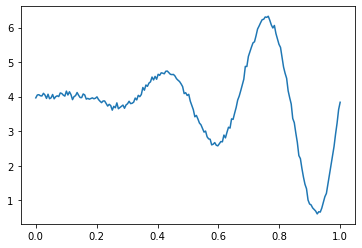

In [3]:
# Create data set

N = 200
x = np.linspace(0,1,N)
y = 4 + 4 * x * x * np.sin(6 * 3.14 * x) + np.random.normal(0,0.05,N)

plt.plot(x,y)
plt.show()

#### Create model

Here we don't have a linear case, so for sure more complicated model is needed. We'll stack multiple wide layers and use nonlinear activation function tanh in the hidden layers. To allow the model to make predictions in a wide range, no activation function is specified for the last layer (if we'd used tanh there, the range of predictions would be restricted to -1..1).

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(1,), activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(1))

model.summary()

model.compile(optimizer='adam', loss='mse')

model.fit(x,y,epochs=400,batch_size=16,verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
__________________________________________________

#### Compare model predictions with data

The predictions indicate that the model is capable of following the data quite well. The fit could be improved by using more layers / wider layers, and possibly higher number of epochs.

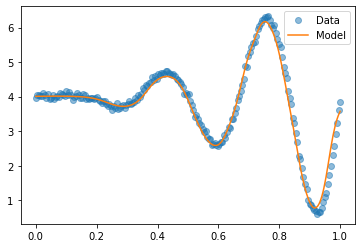

In [5]:
xs = np.linspace(0,1,300)
plt.plot(x, y, 'o', alpha=0.5, label='Data')
plt.plot(xs, model.predict(xs), label="Model")
plt.legend()
plt.show()

#### Extrapolation

Model looked quite good, so let's see if it can be used for making predictions for x values > 1. The answer is no - it is not capturing the function used for creating the data.

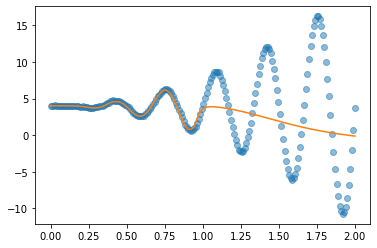

In [6]:
# Create data set

N = 200
x = np.linspace(0,2,N)
y = 4 + 4 * x * x * np.sin(6 * 3.14 * x) + np.random.normal(0,0.05,N)

xs = np.linspace(0,2,300)
plt.plot(x, y, 'o', alpha=0.5, label='Data')
plt.plot(xs, model.predict(xs), label="Model")
plt.show()

## Simple network for Boston housing dataset

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

print("x_train, y_train shapes:")
print(x_train.shape, y_train.shape)
print("x_test, y_test shapes:")
print(x_test.shape, y_test.shape)

print("Training sample 78:")
print(x_train[78])
print(y_train[78])

mean = np.mean(x_train, axis=0)
print("Mean x_train values:")
print(mean)

std = np.std(x_train, axis=0)
print("Std x_train values:")
print(std)

x_train_stan = x_train - mean
x_train_stan = x_train_stan / std

x_test_stan = x_test / mean
x_test_stan = x_test_stan / std

print("Mean x_train values after standardisation:")
print(np.mean(x_train_stan, axis=0))
print("Std x_train values after standardisation:")
print(np.std(x_train_stan, axis=0))

# install package scikit-learn to run the next statements
# note: this is alternative way of doing standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

x_train_ss = scaler.transform(x_train)
x_test_ss = scaler.transform(x_test)

print("Mean x_train values after standardisation with StandardScaler:")
print(np.mean(x_train_ss, axis=0))
print("Std x_train values after standardisation with StandardScaler:")
print(np.std(x_train_ss, axis=0))

x_train, y_train shapes:
(404, 13) (404,)
x_test, y_test shapes:
(102, 13) (102,)
Training sample 78:
[1.7171e-01 2.5000e+01 5.1300e+00 0.0000e+00 4.5300e-01 5.9660e+00
 9.3400e+01 6.8185e+00 8.0000e+00 2.8400e+02 1.9700e+01 3.7808e+02
 1.4440e+01]
16.0
Mean x_train values:
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
Std x_train values:
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
Mean x_train values after standardisation:
[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
Std x_train values after standardisation:
[1. 1. 

## Network model

In [8]:
model1 = keras.Sequential()
model1.add(layers.Dense(1, input_shape=(13,), activation='relu'))

model1.compile(loss='mse', optimizer='sgd')

## Training the model

In [9]:
n_epochs = 30
hist1 = model1.fit(x_train_ss, y_train, epochs=n_epochs, batch_size = 32, validation_data=(x_test_ss, y_test))

Epoch 1/30
13/13 [==============================] - 1s 57ms/step - loss: 481.2940 - val_loss: 317.2825
Epoch 2/30
13/13 [==============================] - 0s 4ms/step - loss: 289.3673 - val_loss: 211.5484
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 189.8046 - val_loss: 170.9140
Epoch 4/30
13/13 [==============================] - 0s 3ms/step - loss: 178.3435 - val_loss: 149.6194
Epoch 5/30
13/13 [==============================] - 0s 3ms/step - loss: 168.1182 - val_loss: 136.0086
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 146.1741 - val_loss: 125.7832
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 121.0214 - val_loss: 118.6785
Epoch 8/30
13/13 [==============================] - 0s 3ms/step - loss: 127.7973 - val_loss: 113.2902
Epoch 9/30
13/13 [==============================] - 0s 3ms/step - loss: 94.2233 - val_loss: 109.2455
Epoch 10/30
13/13 [==============================] - 0s 3ms/step - loss: 102.5237 

## Plotting training/validation loss

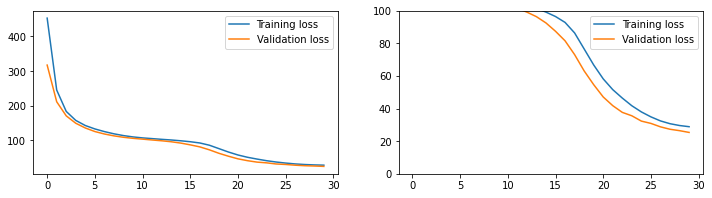

In [10]:
f = plt.figure(figsize=(12,3))

f1 = f.add_subplot(121)
f2 = f.add_subplot(122)

f1.plot(hist1.history['loss'], label="Training loss")
f1.plot(hist1.history['val_loss'], label="Validation loss")
f1.legend()

# make another plot with different scale
f2.set_ylim([0, 100])
f2.plot(hist1.history['loss'], label="Training loss")
f2.plot(hist1.history['val_loss'], label="Validation loss")
f2.legend()

plt.show()